 # Factor construction demo

In [1]:
# 시작하기: 퍼사드 임포트
from qdl.facade import QDL
import pandas as pd
import numpy as np



 ## 과제 목표



 - 국가별로 (usa/kor) --> 할 것 없음

 - Size, Value, Profitability, Investment, Market, Momentum, Short-Term Reversal 팩터들을

 - ew/vw/vw_cap 각각으로 가중치 방법을 다르게 하여

 - 최대한 JKP 팩터 수익률과 비슷한 팩터(수익률)을 만드는 것



 ## 과제 방법



 - `qdl`을 통해 특성/팩터 데이터셋을 로드하여

 - data spec 의 섹션 2: Factor Portfolio Construction 방법론에 따라 구현

     - 주의: Fama French의 double independent sort 방법 쓰지 않음



 ## 데이터 로드

In [2]:
q = QDL()


In [3]:
# 특성(Chars) 데이터셋 (와이드): 초과수익률 
wide_ret_exc = q.load_char(
    country="usa",
    vintage="2020-",
    char="ret_exc",
    date_col="date",
)



In [4]:
print(wide_ret_exc.head(10))


            10026.0      10028.0      10032.0      10044.0      10051.0      \
date                                                                          
2020-01-06          NaN          NaN          NaN          NaN          NaN   
2020-01-09          NaN          NaN          NaN          NaN          NaN   
2020-01-17          NaN          NaN          NaN          NaN          NaN   
2020-01-23          NaN          NaN          NaN          NaN          NaN   
2020-01-24          NaN          NaN          NaN          NaN          NaN   
2020-01-27          NaN          NaN          NaN          NaN          NaN   
2020-01-28          NaN          NaN          NaN          NaN          NaN   
2020-01-30          NaN          NaN          NaN          NaN          NaN   
2020-01-31     -0.10118     0.606243    -0.076807    -0.099756     -0.11634   
2020-02-07          NaN          NaN          NaN          NaN          NaN   

            10066.0      10104.0      10107.0      

 ## 전처리

 ### `eom`



 Q: 날짜는 왜 이렇게 불규칙적인가요?



 A: 그냥 데이터가 그렇습니다.. 월말 기준이어야 하지만 그 때 데이터가 available하지 않은 경우들이 있는 듯 합니다. (추측: 분할/합병을 위한 일시적 거래 정지 등)



 ** data spec 시트의 date 컬럼 설명:



 > Date of the last return observation during the month.

In [5]:
long_chars = q.load_char_dataset( # 특성 데이터셋 원본 로드
    country="usa",
    vintage="2020-",
)


In [6]:
d = '2020-01-06'
a = wide_ret_exc.dropna(how='all', axis=0).copy()

print(a.loc[d, :].dropna())


131672601.0    0.052763
Name: 2020-01-06 00:00:00, dtype: float64


In [7]:
a_id = a.loc[d, :].dropna().index[0]
a_id


np.float64(131672601.0)

In [8]:
print(long_chars[long_chars['id'] == a_id][['id', 'date', 'ret_exc', 'at_gr1']])


                id       date   ret_exc    at_gr1
7154   131672601.0 2025-02-14       NaN  0.074309
12662  131672601.0 2020-01-06  0.052763  0.041159
12907  131672601.0 2020-02-27 -0.361608  0.041159
13165  131672601.0 2020-03-23 -0.549094  0.041159
13931  131672601.0 2020-04-30  0.334612  0.128062
13984  131672601.0 2020-05-28  0.011468  0.128062
14219  131672601.0 2020-06-08  0.022681  0.128062
14464  131672601.0 2020-07-16  0.019403  0.096382
14802  131672601.0 2020-08-19  0.133801  0.096382
15286  131672601.0 2020-09-30       NaN  0.096382
15310  131672601.0 2020-10-26  0.093903  0.027523
15513  131672601.0 2020-11-16  0.145308  0.027523
15910  131672601.0 2020-12-31  0.269863  0.027523
15927  131672601.0 2021-01-07  0.108440 -0.016911
16285  131672601.0 2021-02-26 -0.202231 -0.016911
16533  131672601.0 2021-03-31  0.283173 -0.016911
16827  131672601.0 2021-04-30  0.065234 -0.052062
16993  131672601.0 2021-05-28 -0.049949 -0.052062
17034  131672601.0 2021-06-29 -0.074503 -0.052062




 기존에는 `date` 컬럼을 기본으로 사용



 `eom`을 default로 하여 `date_col=`을 고를 수 있도록 고쳤습니다.

In [9]:
# 특성(Chars) 데이터셋 (와이드): 초과수익률 
wide_ret_exc = q.load_char(
    country="usa",
    vintage="2020-",
    char="ret_exc",
    # date_col="date",
)



In [10]:
print(wide_ret_exc.head(10))


            10026.0      10028.0      10032.0      10044.0      10051.0      \
eom                                                                           
2020-01-31    -0.101180     0.606243    -0.076807    -0.099756    -0.116340   
2020-02-29    -0.031478     0.224598    -0.068278    -0.066112    -0.056877   
2020-03-31    -0.245299    -0.053900    -0.178962    -0.374636    -0.325932   
2020-04-30     0.049832     0.448410     0.149007    -0.052086     0.178431   
2020-05-31     0.012536    -0.016497     0.024347    -0.057202    -0.000059   
2020-06-30    -0.007302     0.699053     0.098612    -0.009435    -0.098150   
2020-07-31    -0.031560    -0.306653     0.052767    -0.218920     0.054252   
2020-08-31     0.104039    -0.082821     0.023881    -0.018151     0.131651   
2020-09-30    -0.036744     0.105594    -0.071589    -0.177990    -0.199469   
2020-10-31     0.039654    -0.058348    -0.015505    -0.000073     0.104225   

            10066.0      10104.0      10107.0      

 ### `size_grp` 불러오기

In [11]:
# 특성(Chars) 데이터셋 (와이드): size_grp
wide_size_grp = q.load_char(
    country="usa",
    vintage="2020-",
    char="size_grp",
)



In [12]:
print(wide_size_grp.head(10))


           10026.0     10028.0     10032.0     10044.0     10051.0      \
eom                                                                      
2020-01-31       large       micro       small       micro       small   
2020-02-29       large       micro       small       micro       small   
2020-03-31       large       micro       small       micro       small   
2020-04-30       large       micro       small       micro       small   
2020-05-31       large       micro       small       micro       small   
2020-06-30       large       micro       small        nano       small   
2020-07-31       small       micro       small        nano       small   
2020-08-31       large       micro       small        nano       small   
2020-09-30       large       micro       small        nano       small   
2020-10-31       large       micro       small        nano       small   

           10066.0     10104.0     10107.0     10138.0     10145.0      ...  \
eom                             

In [13]:
long_chars['size_grp'].unique()


array(['micro', 'nano', 'small', 'large', None, 'mega'], dtype=object)

 > In each country and month, we sort stocks into characteristic terciles (top/middle/bottom third) with breakpoints based on non-micro stocks in that country. Specifically, we start with all non-micro stocks in a country (i.e., larger than NYSE 20th percentile) and sort them into three groups of equal numbers of stocks based on the characteristic, say book-to-market. Then we distribute the micro-cap stocks into the three groups based on the same characteristic breakpoints. This process ensures that the non-micro stocks are distributed equally among across portfolios, creating more tradable portfolios.

 ## 팩터 포트폴리오 만들기



 - investment (CMA, conservative minus aggressive)

   - `at_gr1`

In [14]:
# 특성(Chars) 데이터셋 (와이드): 단일 특성 예시 'at_gr1' (Investment 팩터용)
wide_atgr1 = q.load_char(
    country="usa",
    vintage="2020-",
    char="at_gr1",
)



In [15]:
wide_atgr1_xs_rank = wide_atgr1.rank(axis=1, method='min', pct=True)
print(wide_atgr1_xs_rank.head(5))


            10026.0      10028.0      10032.0      10044.0      10051.0      \
eom                                                                           
2020-01-31     0.573986     0.949165     0.405251     0.503103     0.713842   
2020-02-29     0.572967     0.949761     0.404067     0.501675     0.714354   
2020-03-31     0.571943     0.950036     0.404756     0.483546     0.714148   
2020-04-30     0.683934     0.942946     0.493674     0.453569     0.716400   
2020-05-31     0.681992     0.943487     0.491858     0.451149     0.713602   

            10066.0      10104.0      10107.0      10138.0      10145.0      \
eom                                                                           
2020-01-31          NaN     0.096659     0.549642     0.590692     0.236754   
2020-02-29          NaN     0.095215     0.549282     0.589474     0.237081   
2020-03-31          NaN     0.096565     0.547922     0.588518     0.237569   
2020-04-30          NaN     0.090236     0.544283  

In [16]:
wide_atgr1_xs_high_mask = wide_atgr1_xs_rank >= 0.666
wide_atgr1_xs_low_mask = wide_atgr1_xs_rank <= 0.333


In [17]:
print(wide_atgr1_xs_high_mask.head(5))


            10026.0      10028.0      10032.0      10044.0      10051.0      \
eom                                                                           
2020-01-31        False         True        False        False         True   
2020-02-29        False         True        False        False         True   
2020-03-31        False         True        False        False         True   
2020-04-30         True         True        False        False         True   
2020-05-31         True         True        False        False         True   

            10066.0      10104.0      10107.0      10138.0      10145.0      \
eom                                                                           
2020-01-31        False        False        False        False        False   
2020-02-29        False        False        False        False        False   
2020-03-31        False        False        False        False        False   
2020-04-30        False        False        False  

In [18]:
# shift(1) 하는 이유: forward looking 하지 않기 위해. 
short_port_ew = -1 * wide_ret_exc[wide_atgr1_xs_high_mask.shift(1)] # aggressive
long_port_ew = wide_ret_exc[wide_atgr1_xs_low_mask.shift(1)] # conservative



In [19]:
long_port_returns = long_port_ew.mean(axis=1)
short_port_returns = short_port_ew.mean(axis=1)


In [20]:
investment_factor_returns = long_port_returns + short_port_returns


<Axes: xlabel='eom'>

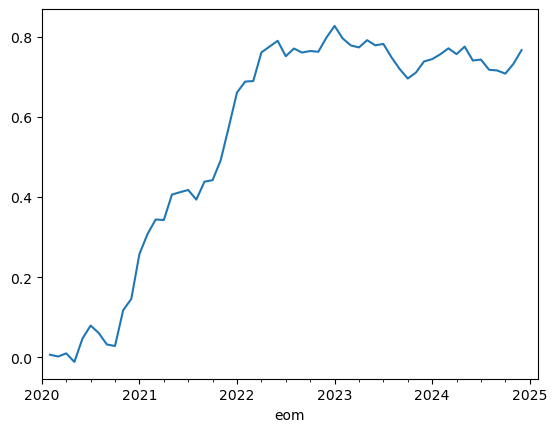

In [21]:
investment_factor_returns.cumsum().plot()


 ## 결과 비교

 ### 팩터 불러오기

<Axes: xlabel='date'>

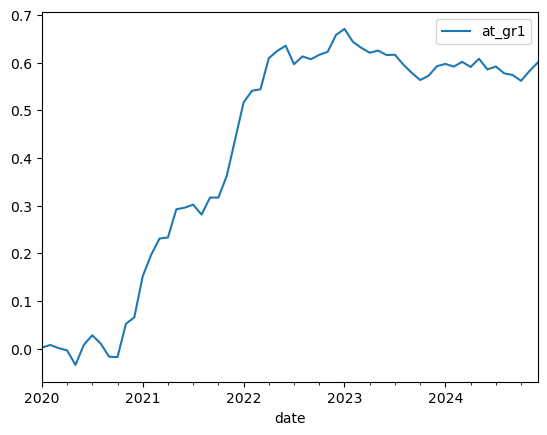

In [22]:
investment_factor_answer =q.load_factors(
    country="usa",
    dataset='factor',
    weighting='ew',
    factors=["at_gr1"],
)

investment_factor_answer.loc['2020-01-06':, :].cumsum().plot()


In [23]:
my_factor = pd.DataFrame(investment_factor_returns)
my_factor.columns = ['at_gr1']


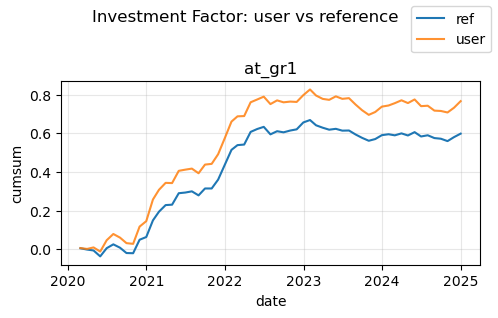

In [24]:
report = q.validate_factor(
    user=my_factor,
    weighting="ew",
    return_plot=True,
    plot_title="Investment Factor: user vs reference",
)



In [25]:
print("\n검증 리포트:")
print("관측치수:", report.n_obs, "시작일:", report.date_start, "종료일:", report.date_end)



검증 리포트:
관측치수: 59 시작일: 2020-02-29 00:00:00 종료일: 2024-12-31 00:00:00


In [26]:
def _fmt(x):
    return f"{x:.3f}" if x is not None else "nan"

print(
    "mse:", _fmt(report.mse),
    "rmse:", _fmt(report.rmse),
    "mae:", _fmt(report.mae),
    "corr:", _fmt(report.corr),
)



mse: 0.736 rmse: 0.858 mae: 0.654 corr: 0.979
